<a href="https://colab.research.google.com/github/hamzaskhan/Battery-Charge-and-Resource-Prompter/blob/main/docs/tutorials/GHZ_State_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 Google

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with qsimcirq

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/qsim/tutorials/qsimcirq"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/qsim/blob/master/docs/tutorials/qsimcirq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/qsim/blob/master/docs/tutorials/qsimcirq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/qsim/docs/tutorials/qsimcirq.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

The qsim library provides a Python interface to Cirq in the **qsimcirq** PyPI package.

## Setup

Install the Cirq and qsimcirq packages:

In [1]:
try:
    import cirq
except ImportError:
    !pip install cirq --quiet
    import cirq

try:
    import qsimcirq
except ImportError:
    !pip install qsimcirq --quiet
    import qsimcirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Simulating Cirq circuits with qsim is easy: just define the circuit as you normally would, then create a `QSimSimulator` to perform the simulation. This object implements Cirq's [simulator.py](https://github.com/quantumlib/Cirq/blob/master/cirq-core/cirq/sim/simulator.py) interfaces, so you can drop it in anywhere the basic Cirq simulator is used.

## Full state-vector simulation

qsim is optimized for computing the final state vector of a circuit. Try it by running the example below.

0: ───H───@───Z───────────M('measurement')───
          │               │
1: ───────X───@───Y───────M──────────────────
              │           │
2: ───────────X───×───────M──────────────────
                  │       │
3: ───H───@───────×───X───M──────────────────
          │               │
4: ───────X───────────────M──────────────────


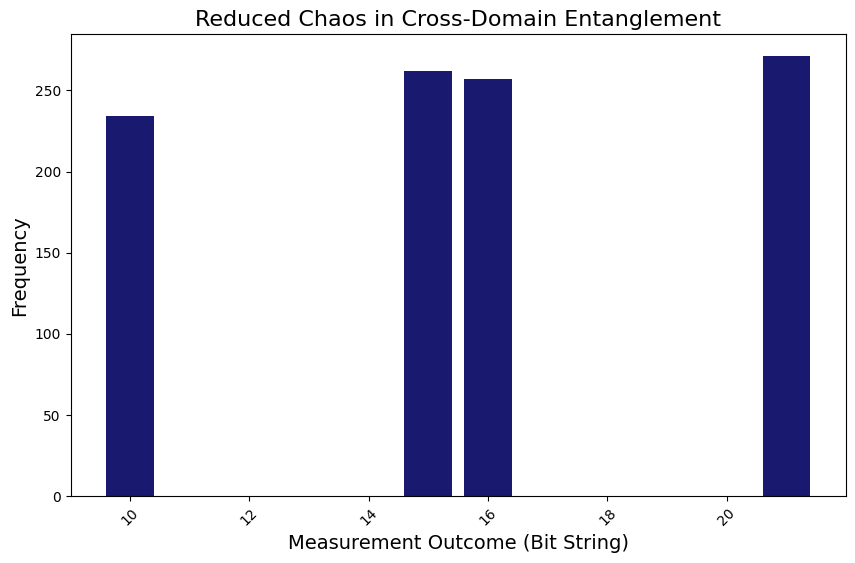

In [12]:
import cirq
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Define a function to simulate limited chaotic interactions
def apply_limited_chaotic_gate(circuit, qubit, entropy_level):
    """Apply random gates to simulate controlled chaotic behavior."""
    if np.random.rand() < entropy_level:
        gate_choice = np.random.choice([cirq.X, cirq.Y, cirq.Z])
        circuit.append(gate_choice(qubit))

# Modified function for reduced chaos in cross-domain entanglement
def entangle_cross_domains_with_limited_chaos(num_qubits_A=3, num_qubits_B=2, entropy_level=0.2):
    total_qubits = num_qubits_A + num_qubits_B
    qubits = [cirq.LineQubit(i) for i in range(total_qubits)]
    circuit = cirq.Circuit()

    # Apply Hadamard gate to the first qubit of each domain
    circuit.append(cirq.H(qubits[0]))  # A_1
    circuit.append(cirq.H(qubits[num_qubits_A]))  # B_1

    # Entangling within each subspace
    for i in range(num_qubits_A - 1):
        circuit.append(cirq.CX(qubits[i], qubits[i + 1]))
        apply_limited_chaotic_gate(circuit, qubits[i], entropy_level)

    for i in range(num_qubits_B - 1):
        circuit.append(cirq.CX(qubits[num_qubits_A + i], qubits[num_qubits_A + i + 1]))
        apply_limited_chaotic_gate(circuit, qubits[num_qubits_A + i], entropy_level)

    # Cross-domain entanglement with limited chaos
    circuit.append(cirq.SWAP(qubits[num_qubits_A - 1], qubits[num_qubits_A]))
    apply_limited_chaotic_gate(circuit, qubits[num_qubits_A - 1], entropy_level)
    apply_limited_chaotic_gate(circuit, qubits[num_qubits_A], entropy_level)

    # Measure all qubits
    circuit.append(cirq.measure(*qubits, key='measurement'))

    return circuit

# Function to execute the quantum circuit and plot results
def run_and_plot_limited_chaos_circuit(circuit, num_shots=1024):
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=num_shots)
    counts = result.histogram(key='measurement')
    plot_measurements(counts)

# Plotting function
def plot_measurements(counts):
    plt.figure(figsize=(10, 6))
    plt.bar(counts.keys(), counts.values(), color='midnightblue')
    plt.xlabel('Measurement Outcome (Bit String)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Reduced Chaos in Cross-Domain Entanglement', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

# Main Execution
if __name__ == "__main__":
    num_qubits_A = 3
    num_qubits_B = 2
    entropy_level = 0.2  # Lower entropy level to reduce randomness

    # Create circuit with limited chaos
    circuit = entangle_cross_domains_with_limited_chaos(num_qubits_A, num_qubits_B, entropy_level)

    # Print circuit for reference
    print(circuit)

    # Run and plot the results
    run_and_plot_limited_chaos_circuit(circuit)


To sample from this state, you can invoke Cirq's `sample_state_vector` method:

In [ ]:
samples = cirq.sample_state_vector(
    qsim_results.state_vector(), indices=[0, 1], repetitions=10)
print(samples)

## Measurement sampling

qsim also supports sampling from user-defined measurement gates.

> *Note*: Since qsim and Cirq use different random number generators, identical runs on both simulators may give different results, even if they use the same seed.

In [ ]:
# Define a circuit with measurements.
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(
    cirq.H(q0), cirq.X(q1), cirq.CX(q0, q1),
    cirq.measure(q0, key='qubit_0'),
    cirq.measure(q1, key='qubit_1'),
)
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with Cirq and return just the measurement values.
print('Cirq results:')
cirq_simulator = cirq.Simulator()
cirq_results = cirq_simulator.run(circuit, repetitions=5)
print(cirq_results)
print()

# Simulate the circuit with qsim and return just the measurement values.
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.run(circuit, repetitions=5)
print(qsim_results)

The warning above highlights an important distinction between the `simulate` and `run` methods:

* `simulate` only executes the circuit once.
  -  Sampling from the resulting state is fast, but if there are intermediate measurements the final state vector depends on the results of those measurements.
* `run` will execute the circuit once for each repetition requested.
  -  As a result, sampling is much slower, but intermediate measurements are re-sampled for each repetition. If there are no intermediate measurements, `run` redirects to `simulate` for faster execution.

The warning goes away if intermediate measurements are present:

In [ ]:
# Define a circuit with intermediate measurements.
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.X(q0)**0.5, cirq.measure(q0, key='m0'),
    cirq.X(q0)**0.5, cirq.measure(q0, key='m1'),
    cirq.X(q0)**0.5, cirq.measure(q0, key='m2'),
)
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with qsim and return just the measurement values.
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.run(circuit, repetitions=5)
print(qsim_results)

## Amplitude evaluation

qsim can also calculate amplitudes for specific output bitstrings.

In [ ]:
# Define a simple circuit.
q0, q1 = cirq.LineQubit.range(2)
circuit = cirq.Circuit(cirq.H(q0), cirq.CX(q0, q1))
print("Circuit:")
print(circuit)
print()

# Simulate the circuit with qsim and return the amplitudes for |00) and |01).
print('Cirq results:')
cirq_simulator = cirq.Simulator()
cirq_results = cirq_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01])
print(cirq_results)
print()

# Simulate the circuit with qsim and return the amplitudes for |00) and |01).
print('qsim results:')
qsim_simulator = qsimcirq.QSimSimulator()
qsim_results = qsim_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01])
print(qsim_results)

## Performance benchmark

The code below generates a depth-16 circuit on a 4x5 qubit grid, then runs it against the basic Cirq simulator. For a circuit of this size, the difference in runtime can be significant - try it out!

In [ ]:
import time

# Get a rectangular grid of qubits.
qubits = cirq.GridQubit.rect(4, 5)

# Generates a random circuit on the provided qubits.
circuit = cirq.experiments.random_rotations_between_grid_interaction_layers_circuit(
    qubits=qubits, depth=16)

# Simulate the circuit with Cirq and print the runtime.
cirq_simulator = cirq.Simulator()
cirq_start = time.time()
cirq_results = cirq_simulator.simulate(circuit)
cirq_elapsed = time.time() - cirq_start
print(f'Cirq runtime: {cirq_elapsed} seconds.')
print()

# Simulate the circuit with qsim and print the runtime.
qsim_simulator = qsimcirq.QSimSimulator()
qsim_start = time.time()
qsim_results = qsim_simulator.simulate(circuit)
qsim_elapsed = time.time() - qsim_start
print(f'qsim runtime: {qsim_elapsed} seconds.')

qsim performance can be tuned further by passing options to the simulator constructor. These options use the same format as the qsim_base binary - a full description can be found in the qsim [usage doc](https://github.com/quantumlib/qsim/blob/master/docs/usage.md). The example below demonstrates enabling multithreading in qsim; for best performance, use the same number of threads as the number of cores (or virtual cores) on your machine.

In [ ]:
# Use eight threads to parallelize simulation.
options = {'t': 8}

qsim_simulator = qsimcirq.QSimSimulator(options)
qsim_start = time.time()
qsim_results = qsim_simulator.simulate(circuit)
qsim_elapsed = time.time() - qsim_start
print(f'qsim runtime: {qsim_elapsed} seconds.')

Another option is to adjust the maximum number of qubits over which to fuse gates. Increasing this value (as demonstrated below) increases arithmetic intensity, which may improve performance with the right environment settings.

In [ ]:
# Increase maximum fused gate size to three qubits.
options = {'f': 3}

qsim_simulator = qsimcirq.QSimSimulator(options)
qsim_start = time.time()
qsim_results = qsim_simulator.simulate(circuit)
qsim_elapsed = time.time() - qsim_start
print(f'qsim runtime: {qsim_elapsed} seconds.')

## Advanced applications: Distributed execution

qsimh (qsim-hybrid) is a second library in the qsim repository that takes a slightly different approach to circuit simulation. When simulating a quantum circuit, it's possible to simplify the execution by decomposing a subset of two-qubit gates into pairs of one-qubit gates with shared indices. This operation is called "slicing" (or "cutting") the gates.

qsimh takes advantage of the "slicing" operation by selecting a set of gates to "slice" and assigning each possible value of the shared indices across a set of executors running in parallel. By adding up the results afterwards, the total state can be recovered.

In [ ]:
# Pick a pair of qubits.
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(0, 1)

# Create a circuit that entangles the pair.
circuit = cirq.Circuit(
    cirq.H(q0), cirq.CX(q0, q1), cirq.X(q1)
)
print("Circuit:")
print(circuit)

In order to let qsimh know how we want to split up the circuit, we need to pass it some additional options. More detail on these can be found in the qsim [usage doc](https://github.com/quantumlib/qsim/blob/master/docs/usage.md), but the fundamentals are explained below.

In [ ]:
options = {}

# 'k' indicates the qubits on one side of the cut.
# We'll use qubit 0 for this.
options['k'] = [0]

# 'p' and 'r' control when values are assigned to cut indices.
# There are some intricacies in choosing values for these options,
# but for now we'll set p=1 and r=0.
# This allows us to pre-assign the value of the CX indices
# and distribute its execution to multiple jobs.
options['p'] = 1
options['r'] = 0

# 'w' indicates the value pre-assigned to the cut.
# This should change for each execution.
options['w'] = 0

# Create the qsimh simulator with those options.
qsimh_simulator = qsimcirq.QSimhSimulator(options)
results_0 = qsimh_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01, 0b10, 0b11])
print(results_0)

Now to run the other side of the cut...

In [ ]:
options['w'] = 1

qsimh_simulator = qsimcirq.QSimhSimulator(options)
results_1 = qsimh_simulator.compute_amplitudes(
    circuit, bitstrings=[0b00, 0b01, 0b10, 0b11])
print(results_1)

...and add the two together. The results of a normal qsim simulation are shown for comparison.

In [ ]:
results = [r0 + r1 for r0, r1 in zip(results_0, results_1)]
print("qsimh results:")
print(results)

qsim_simulator = qsimcirq.QSimSimulator()
qsim_simulator.compute_amplitudes(circuit, bitstrings=[0b00, 0b01, 0b10, 0b11])
print("qsim results:")
print(results)

The key point to note here is that `results_0` and `results_1` are completely independent - they can be run in parallel on two separate machines, with no communication between the two. Getting the full result requires `2^p` executions, but each individual result is much cheaper to calculate than trying to do the whole circuit at once.